# Pré Processamento

## Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

É feita a leitura do Dataset `.xlsx` usando `read_excel`, em seguida, o mesmo é convertido para `.csv`.

In [3]:
xlsx = pd.read_excel('data/Online_Retail.xlsx')

In [4]:
xlsx.to_csv('data/online_retail.csv', encoding='utf-8', index=False)

A leitura do Dataframe armazenada na variável `df`. Logo de início já se pode observar que o dataframe contém 541909 registros com 8 colunas cada.

In [5]:
df = pd.read_csv('data/online_retail.csv')

In [6]:
df.shape

(541909, 8)

Abaixo é possível ter uma ideia de como o Dataset está estruturado e o que cada coluna representa. De acordo com a descrição da UCI e pelo que se pode ver nesses primeiros registros, a coluna `Country` representa a origem do pedido.

`InvoiceNo` é um número que se repete, portanto empiricamente e pelo seu nome pode-se relacioná-lo como sendo um identificador da transação ocorrida.

Cada registro representa uma transação, então pelos nomes das colunas podemos identificar `StockCode` e `CustomerID` como sendo código de identificação do produto no estoque e identificador do cliente que realizou a compra.

Por conseguinte, em `Description` temos uma descrição do produto, em `Quantity` a quantidade comprada na transação, `InvoiceDate` a data da mesma e `UnitPrice` busca representar o preço unitário.

Outro aspecto interessante à ser observado é que uma transação é a relação entre a compra de N unidade de um produto com um cliente, então uma compra com diversos items tem diversas transações.

In [7]:
df.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


É feita a busca por valores nulos. 

Logo ao plotar o mapa de calor, é possível observar que a coluna `CustomerId` tem bastante ocorrência de valores nulos, mais especificamente `135080`, cerca de `24,9%` dos registros.

Já o campo `Description` possui `1454` valores nulos, representando `0,26%` do total de registros.

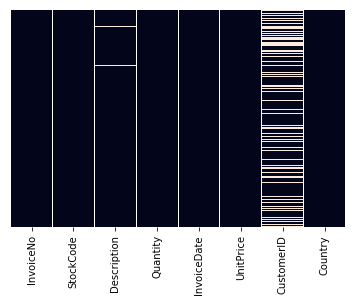

In [10]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Descartando todos os registros com valores nulos

In [12]:
df.dropna(inplace=True)

## Feature Engineering

Ao observar o dataframe modificado, é possível notar que foram removidos todos os registros com valores nulos.

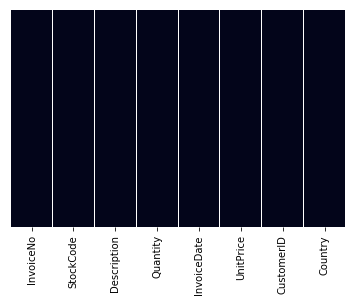

In [13]:
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [15]:
df.shape

(406829, 8)

Busca e remoção de registros duplicados

In [16]:
df.duplicated().sum()

5225

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.shape

(401604, 8)

Ao fim destas seleções supracitadas, o dataframe fica com `401604` registros.

### Adicionando coluna de Pedido Cancelado

É possível observar nos registros que os registros em que o `InvoiceNo` contém um C, também contém uma quantidade negativa de produtos, ou seja... Pode ser entendido como devolução/cancelamento de transação.

In [19]:
df['OrderCanceled'] = df['InvoiceNo'].apply(lambda invoice : int('C' in invoice))

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0


In [21]:
print('Quantidade de produtos cancelados:', df['OrderCanceled'].sum())

Quantidade de produtos cancelados: 8872


### Verificando total de Pedidos Cancelados

In [23]:
d = { 'InvoiceNo': df['InvoiceNo'], 'OrderCanceled': df['OrderCanceled'] }
order_canceled = pd.DataFrame(data=d)
order_canceled.drop_duplicates(inplace = True)
order_canceled.head()

,InvoiceNo,OrderCanceled
0,536365,0
7,536366,0
9,536367,0
21,536368,0
25,536369,0


In [44]:
print('Total de pedidos cancelados:', sum(order_canceled['OrderCanceled']))

Total de pedidos cancelados: 3654


### Explorando o Código do Produto

Assim como na **InvoiceNo** que contem o C para representar o cancelamento, foi verificado que há varios registros que continham strings em seu **StockCode**, como pode ser verificado abaixo:

In [25]:
exists_char = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]
exists_char.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,OrderCanceled
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France,0
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,1
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands,0
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany,0
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE,0
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,0
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274.0,United Kingdom,0
4406,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom,0
5073,536840,POST,POSTAGE,1,2010-12-02 18:27:00,18.00,12738.0,Germany,0
5258,536852,POST,POSTAGE,1,2010-12-03 09:51:00,18.00,12686.0,France,0


Nota-se que, na tabela, a coluna **Stock Code** e **Description** tem valores similares. Assim, pode-se afirmar que, nestes casos, há relação entre as duas colunas, onde o código é explicado através de sua descrição

In [26]:
c = { 'StockCode': exists_char['StockCode'], 'Description': exists_char['Description'] }
code = pd.DataFrame(data=c)
code.drop_duplicates(inplace = True)
code

,Description,StockCode
45,POSTAGE,POST
141,Discount,D
1423,CARRIAGE,C2
2239,Manual,M
4406,Bank Charges,BANK CHARGES
157195,PADS TO MATCH ALL CUSHIONS,PADS
317507,DOTCOM POSTAGE,DOT
317508,CRUK Commission,CRUK


Fazendo uma contagem de valores únicos é possível observar que foram realizadas 22190 compras (contém várias transações) por 4372 clientes e podem contar-se 3684 produtos.

In [74]:
pd.DataFrame([{'Compras': len(df['InvoiceNo'].value_counts()),
               'Produtos': len(df['StockCode'].value_counts()),    
               'Clientes': len(df['CustomerID'].value_counts()),  
              }], columns = ['Compras', 'Produtos', 'Clientes'], index = ['Quantidade'])

,Compras,Produtos,Clientes
Quantidade,22190,3684,4372


### Agrupamento por compra

Abaixo é feito um agrupamento por compra e feita a ordenação de acordo com o número de produtos em cada compra em ordem crescente. De acordo com o início da lista, já é possível observar que poucas transações tem menos que uma dezena de items.

In [78]:
buy = df.groupby(by=['InvoiceNo', 'CustomerID'], as_index=False)['InvoiceDate'].count().rename(columns = {'InvoiceDate':'Número de produtos'})
display(buy.head(10).sort_values('Número de produtos'))
buy.describe()

,InvoiceNo,CustomerID,Número de produtos
4,536369,13047.0,1
6,536371,13748.0,1
9,536374,15100.0,1
1,536366,17850.0,2
7,536372,17850.0,2
3,536368,13047.0,4
0,536365,17850.0,7
2,536367,13047.0,12
8,536373,17850.0,16
5,536370,12583.0,20


,CustomerID,Número de produtos
count,22190.000000,22190.000000
mean,15238.498738,18.098423
std,1733.149624,23.363888
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


In [93]:
country = df[['Country', 'InvoiceNo']]
country = country.pivot_table(columns='Country', aggfunc='count')
country.sort_values('InvoiceNo', axis=1, ascending=False).T

,InvoiceNo
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


### Experimento